# 1.  前期准备

## 1.1 Packages

In [1]:
pip install kaggle

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [kaggle]2m4/5 [kaggle]f]
Note: you may need to restart the kernel to use updated packages.


In [2]:
#导入pandas库 numpy库 matplotlib库 seaborn库
#（matplotlib.pyplot是绘制种类可视化图形的命令字库）
#它们都是国际惯例的导入方式
#因为版本的更新，可能Pandas的某些用法
#在不久将来会被移除，经常会出现一些警告
#(不是报错) 这些代码可忽略相关警告
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1.2 读入数据

In [5]:
#csv是逗号分隔值文件格式
#读取heart.csv文件
#df是DataFrame的缩写
df = pd.read_csv("heart.csv")

In [6]:
#读取进来的数据把第一行看做列名，并默认输出之后的五行，在head后面的括号里面直接写
#你想要输出的行数也行
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#获取df的数据形状（几行几列）
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 1.3 预处理

### 1.3.1 除去空值

In [9]:
#np.nan是pandas中常见空值，使用dropna过滤空值
df.dropna()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 1.3.2 查看数据主要信息

In [10]:
#查看数据表的基本信息（维度，列名称，数据格式，
#所占空间等）
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 1.3.3  查看所有属性数目

In [11]:
#创建字典 df.columns获取数据表的列数
dict = {}
for i in list(df.columns):
#统计数据表每列属性的值的个数（shape[0]第一维度的长度）
    dict[i] = df[i].value_counts().shape[0]
#输入是词典时，key就是列标签名，必须自定义行索引index
pd.DataFrame(dict,index=["unique count"])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
unique count,41,2,4,49,152,2,3,91,2,40,3,5,4,2


### 1.3.4 汇总统计数据

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# 2. 数据可视化分析

Text(0.5, 1.0, 'Figure1   Attribute Correlation')

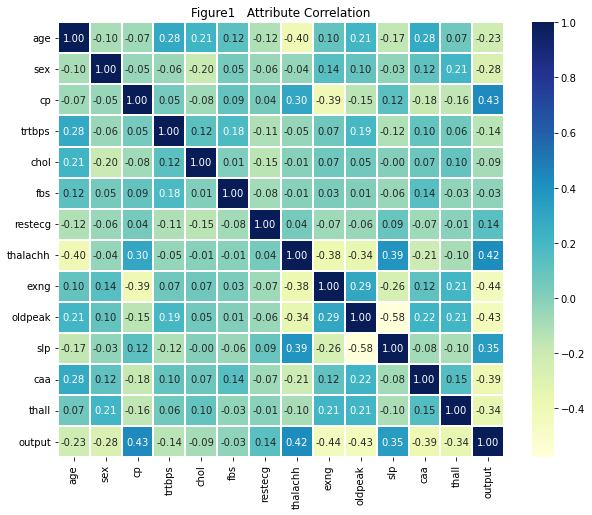

In [13]:
plt.figure(figsize=(10,8))
T1=sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)#热图查看属性相关性
T1.set_title("Figure1   Attribute Correlation")

In [14]:
#查看患病人数：1为患病，0为正常
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

Text(0.5, 1.0, 'Figure2   Age Distribution')

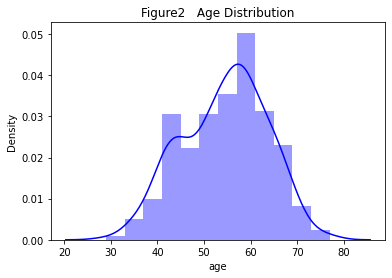

In [15]:
#查看数据年龄分布
T2=sns.distplot(df['age'],color='blue')
T2.set_title("Figure2   Age Distribution")

Text(0.5, 1.0, 'Figure3   Age & Heart Disease')

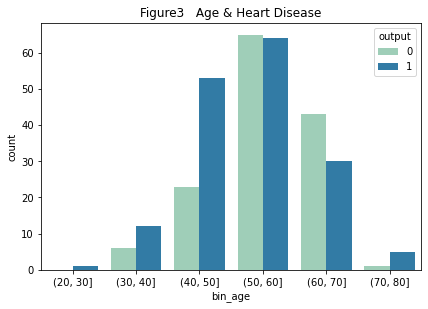

In [16]:
#分析年龄和心脏病的关系（output:1为患病，0为正常）
fig,ax=plt.subplots(figsize=(15,10))# 设置图片大小为15*10
plt.subplot(2,2,1)#将页面分割为2*2的网格1
#自定义区间并根据数据划分
age_bins = [20,30,40,50,60,70,80] 
df['bin_age']=pd.cut(df['age'], bins=age_bins)
#建立坐标轴并按照output的值分类形成分类的条形图
T3=sns.countplot(x='bin_age',data=df ,hue='output',palette='YlGnBu')
T3.set_title("Figure3   Age & Heart Disease")

Text(0.5, 1.0, 'Figure4   Sex & Heart Disease')

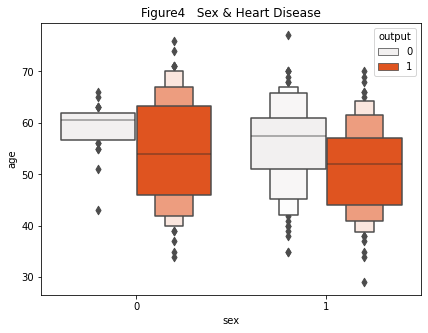

In [17]:
#分析不同年龄段男女性和心脏病的关系(注sex：1为男性，0为女性;output:1为患病，0为正常)
fig,ax=plt.subplots(figsize=(15,5))
plt.subplot(1,2,2)
#建立坐标轴并统计df中按照output的值分类形成分类的条形图
T4=sns.boxenplot(x='sex',y='age',hue='output',data=df,color='#FF4500')
T4.set_title("Figure4   Sex & Heart Disease")

Text(0.5, 1.0, 'Figure5   Chest pain type & Heart Disease')

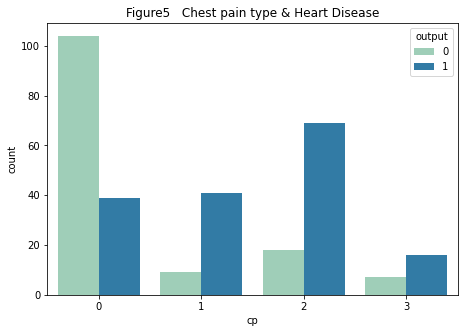

In [18]:
#3种胸痛类型和心脏病的关系
#（胸痛类型1:典型心绞痛、2:非典型心绞痛；3:非心绞痛）
fig,ax=plt.subplots(figsize=(25,5))
plt.subplot(1,3,1)
#统计df数据中output和‘cp’属性中3种类别数量
T5=sns.countplot(x='cp',data=df,hue='output',palette='YlGnBu')
T5.set_title('Figure5   Chest pain type & Heart Disease')

Text(0.5, 1.0, 'Figure6   Age & Chest pain')

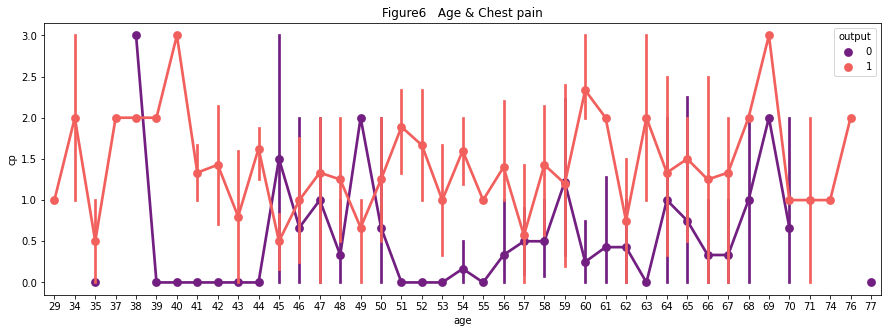

In [19]:
#胸痛和年龄的关系
fig,ax=plt.subplots(figsize=(15,5))
#统计df数据中output标识下胸痛和年龄的关系
sns.pointplot(x='age',y='cp',data=df,hue='output',palette='magma')
plt.title('Figure6   Age & Chest pain')

Text(0.5, 1.0, 'Figure7   Cholestoral & Heart Disease')

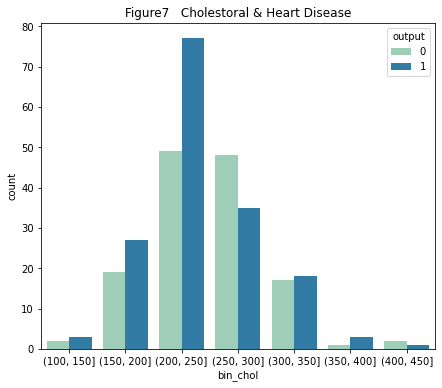

In [20]:
#血清胆固醇的含量与心脏病的关系
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1, 3, 2)
#自定义区间并根据数据划分
cho_bins = [100,150,200,250,300,350,400,450]
df['bin_chol']=pd.cut(df['chol'], bins=cho_bins)
#统计df数据中'chol'属性不同区间中output数量
T7=sns.countplot(x='bin_chol',data=df,hue='output',palette='YlGnBu')
T7.set_title("Figure7   Cholestoral & Heart Disease")

Text(0.5, 1.0, 'Figure8   Thalach & Heart Disease')

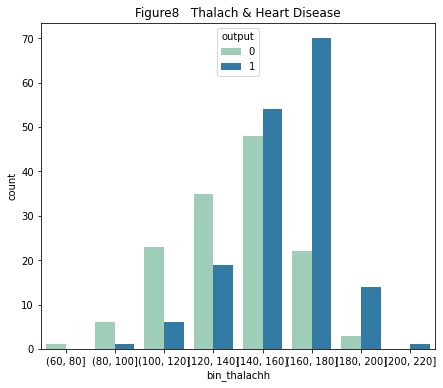

In [21]:
#心率与心脏病的关系
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1, 3, 3)
#自定义区间并根据数据划分
thal_bins=[60,80,100,120,140,160,180,200,220]
df['bin_thalachh']=pd.cut(df['thalachh'], bins=thal_bins)
#统计df数据中'thalachh'属性不同区间中output类别数量
T8=sns.countplot(x='bin_thalachh',data=df,hue='output',palette='YlGnBu')
T8.set_title("Figure8   Thalach & Heart Disease")

Text(0.5, 1.0, 'Figure9   Age & Thalachh')

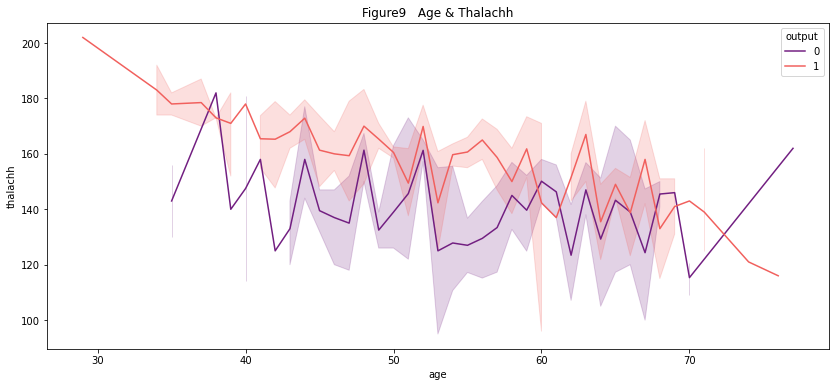

In [22]:
#年龄和最大心率的关系
#（注：thal:1为正常，2为固定缺陷，3为可逆缺陷）
fig,ax=plt.subplots(figsize=(14,6))
#通过output标识下年龄和最大心率的关系
T9=sns.lineplot(y='thalachh',x='age',data=df,hue="output",palette='magma')
plt.title('Figure9   Age & Thalachh')

Text(0.5, 1.0, 'Figure10   Sex & Heart Disease')

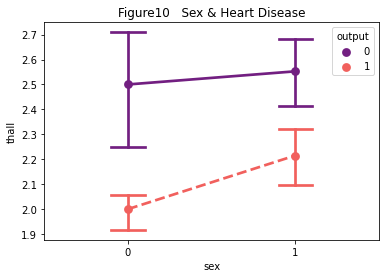

In [23]:
#性别与诊断值的关系(thall:1为正常，2为固定缺陷，3为可逆缺陷)
T10 = sns.pointplot(x='sex',y='thall',data=df,hue='output',linestyles=["-", "--"],capsize=.2,palette='magma')
T10.set_title('Figure10   Sex & Heart Disease')

Text(0.5, 1.0, 'Figure11   slope of the peak exercise ST segment & Heart Disease')

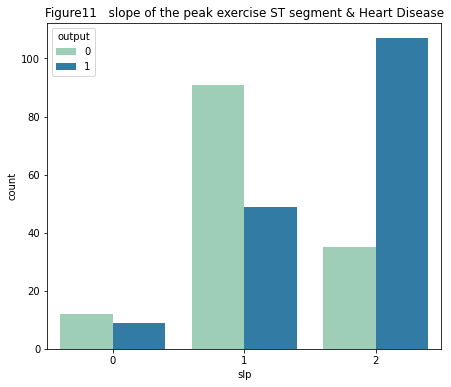

In [24]:
# 运动引起的ST段最高值斜率和心脏病的关系
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1,3,1)
#df数据中output标识下运动引起的不同ST段最高值斜率数量
T11 = sns.countplot(x='slp',data=df,hue='output',palette='YlGnBu')
T11.set_title('Figure11   slope of the peak exercise ST segment & Heart Disease')

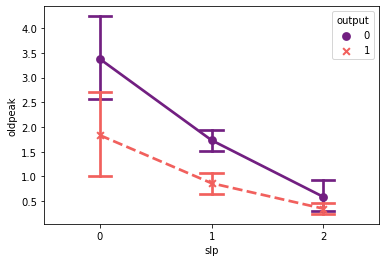

In [25]:
#运动后ST段的斜率相对于休息时候ST段抑制间的相关性
T12 = sns.pointplot(x='slp',y='oldpeak',data=df,hue='output',markers=["o", "x"],linestyles=["-", "--"],capsize=.2,palette='magma')

# 3. 模型预测比较

## 3.1 特征工程

In [34]:
#导入sklearn库
# Scaling （特征缩放之一：RobustScaler是基于中位数的缩放方法）
#具体是减去中位数再除以第3分位数和第1分位数之间的差值。
#见右图公式所示
from sklearn.preprocessing import RobustScaler
# 在sklearn的model_selection模块中提供了Train Test Split 函数
#（该函数是最常用的数据划分方法）
from sklearn.model_selection import train_test_split
# Models 导入torch库 torch.neural network神经网络
#import torch
#import torch.nn as nn
#使用sklearn估计器构建分类模型和线性回归模型
#在sklearn库中的svc模块中引入SVC函数（算法：支持向量机/支持向量回归）
from sklearn.svm import SVC
#在sklearn库中的linear_model的模块中引入LogisticRegression函数（算法:逻辑斯蒂回归）
from sklearn.linear_model import LogisticRegression
#在sklearn库中的ensemble的模块中引入RandomForestClassifier函数（算法：随机森林分类/回归）
from sklearn.ensemble import RandomForestClassifier
#在sklearn库中的tree 的模块中引入DecisionTreeClassifier函数（算法：分类/回归决策树）
from sklearn.tree import DecisionTreeClassifier
#在sklearn库中的ensemble的模块中引入GradientBoostingClassifier函数（算法：梯度提升分类/回归树）
from sklearn.ensemble import GradientBoostingClassifier
# Metrics 混淆矩阵
#在sklearn库中的的metrics模块中引入accuracy_score函数（计算准确率) classification_report函数
#（二分类）因为样本的不平衡性所以我们在关注准确性的前提下，希望输出一个混淆矩阵，进行评价
#roc曲线是基于测试集来做的的
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation 在sklearn库中的的model_selection 模块中引入cross_val_score函数（交叉验证评分)
#和cross_val_score函数（网络搜索法）二者结合起来找到模型的最优参数
#在分隔数据集后，我们训练模型，通过评分来看模型的表现
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [49]:
#复制该数据集
# creating a copy of df
df1 = df
# define the columns to be encoded and scaled
#定义要编码和缩放的列 分类列和连续列
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
#对分类列进行编码 需要虚拟编码 也就是k-1个自由度
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# 定义特性和目标
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# 实例化标量
scaler = RobustScaler()
X=X.drop(axis=1,labels=["bin_age"],inplace=False)
X=X.drop(axis=1,labels=["bin_chol"],inplace=False)
X=X.drop(axis=1,labels=["bin_thalachh"],inplace=False)

# scaling the continuous featuree（缩放连续特性）
#fit_transform方法是fit和transform的结合，fit_transform(X_train)
#意思是找出X_train的和，并应用在X_train上。即fit_transform(partData)对部分数据先拟合fit，
#找到该part的整体指标，如均值、方差、最大值最小值等等（根据具体转换的目的），
#然后对该partData进行转换transform，从而实现数据的标准化、归一化等
X[con_cols] = scaler.fit_transform(X[con_cols])
X.head().transpose()

,0,1,2,3,4
age,0.592593,-1.333333,-1.037037,0.074074,0.148148
trtbps,0.750000,0.000000,0.000000,-0.500000,-0.500000
chol,-0.110236,0.157480,-0.566929,-0.062992,1.795276
thalachh,-0.092308,1.046154,0.584615,0.769231,0.307692
oldpeak,0.937500,1.687500,0.375000,0.000000,-0.125000
sex_1,1.000000,1.000000,0.000000,1.000000,0.000000
exng_1,0.000000,0.000000,0.000000,0.000000,1.000000
caa_1,0.000000,0.000000,0.000000,0.000000,0.000000
caa_2,0.000000,0.000000,0.000000,0.000000,0.000000
caa_3,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
#划分测试集和训练集
#test_size：训练集测试集比例关系，一般取0.2、0.25、0.3
#random_state：生成伪随机数的方法，任意整数即可
#注意output四个变量的顺序；以及输出为list，转成array或者DataFrame需要继续处理
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (242, 22)
The shape of X_test is: (61, 22)
The shape of y_train is: (242, 1)
The shape of y_test is: (61, 1)


## 3.2 SVM

In [48]:
#支持向量机SVM(Support Vector Machine)是一个有监督的学习模型，
#通常用来进行模式识别、分类(异常值检测)以及回归分析。
# 对象的实例化和匹配
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)
# 预测值
y_pred = clf.predict(X_test)
# 打印测试精
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8688524590163934


## 3.3 决策树

In [47]:
# 实例化对象
dt = DecisionTreeClassifier(random_state = 42)
# 匹配模型
dt.fit(X_train, y_train)
# 计算预测
y_pred = dt.predict(X_test)
# 打印测试精度
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7868852459016393


## 3.4 随机森林

In [46]:
# 实例化对象
rf = RandomForestClassifier()
# 匹配模型
rf.fit(X_train, y_train)
# 计算预测
y_pred = dt.predict(X_test)
# 打印测试精度
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7868852459016393


## 3.5 逻辑回归

In [44]:
# 实例化对象
logreg = LogisticRegression()
# 匹配对象
logreg.fit(X_train, y_train)
# 计算预测值
y_pred_proba = logreg.predict_proba(X_test)
# 寻找预测值
y_pred = np.argmax(y_pred_proba,axis=1)
# 打印测试精度
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.9016393442622951


### 3.5.1 ROC曲线--对模型进行评估

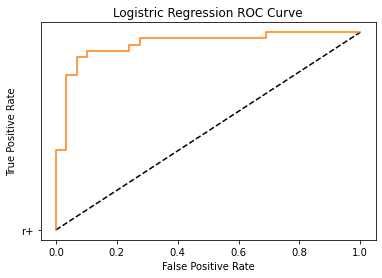

In [45]:
# 计算预测值
y_pred_prob = logreg.predict_proba(X_test)[:,1]
# 实例化roc曲线
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)
# 绘制曲线
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()